# Artificial Intelligence FS 2022

## Automatic Classification of Pneunomia based on X-rays

---

The exercise is about train a supervised learning algorithm (CNN) for the detection of pneumonia based on image features extracted from pre-trained CNN models. Along this project, there are different subtasks to be done. Each of these subtasks are going to be explained on detail below. Your task is to fill this jupyter notebook.

## Tasks
1. **Transfer Learning**: consider using different pre-trained CNN architectures for extracting the image features. For a complete overview of different pre-trained architectures have a look at [CNN-zoo](https://pytorch.org/vision/stable/models.html). Repeat the training and evaluating/fine-tuning process.
2. **Experimental evaluation**: use different CNN architectures and compare their accuracies. Also fine-tune them properly and evaluate their results. Which one performed best? What is the intuition behind? Some examples of CNN architecture include: VGG-16, ResNet50, ShuffleNetv2, EfficientNets. Also, what happens if your train your models from scratch, instead of finetuning them?
3. Summarize what are the strenghts and weaknesses of each of the implemented models.Which architectures help the most and why? 
4. Given the fact that the dataset is skewed (more samples from one class than the other), how can you tackle the problem of class imbalance? Proof that your idea works by implementing it.
5. One key aspect when dealing with AI models is the interpretability of their results. As such, investigate: ($i$) how the trained filters look like (visualise the learned weights),  ($ii$) use class activation maps (CAMs) to visualise which parts of the image are used for pneunomia classification?
6. Instead of fine-tuning your CNN models, extract feature vectors from your pre-trained CNN models by feeding them with the images and feed-forwarding the images through the model. Next, we collect feature vectors from the FC layers of the model. The collection of those vetors will represent the new dataset, over which we will train different ML classifiers (e.g. Random Forest, XGBoost ). Compare their classification results and also against the results obtained from the transfer-learning approach [BONUS].

## Our Solution

In this project, we aim to train a supervised learning algorithm for the detection of pneumonia based on image features extracted from pre-trained CNN models. Our goal is to compare the performance of different CNN architectures, and to explore the impact of fine-tuning on model performance.

We begin by collecting a dataset of images containing pneumonia, as well as a set of control images that do not contain pneumonia. We then pre-process these images and extract features using a pre-trained CNN model.

### Task 4: Class Imbalance
Given the fact that the dataset is skewed (more samples from one class than the other), how can you tackle the problem of class imbalance? Proof that your idea works by implementing it. We noticed that there are a lots of training data for pneunomia test images, but a clear lack for healthy images as seen in the histogram. We found a solution called data augomentation which we used for the training data. To get more data, we made minor alterations to our existing dataset. We flipped, cropped, and rotated the images to provide our neural network with additional information. By doing this, we were able to improve the performance of our model by providing it with a greater variety of data. This allowed our network to effectively see many different versions of the same image. We also converted the data to Torch Tensors and normalized it using standardized normalization values. We did not augment the validation and testing data in the same way, but we did resize and normalize it. First we thought that we need to save the ramdomly transormed images, but then we figured out that during epochs the model will see many different versions of the healthy train images by augomentation and this is similar.

### Task 2 Experimental Evaluation
Next, we train several different CNN architectures on the extracted features, including VGG-16, ResNet50, ShuffleNetv2, and EfficientNets. We use the same training, validation, and testing splits for all of the models, and we evaluate their performance using a common metric such as accuracy.

#### Which one performed best?
TODO

#### What is the intuition behind?
One way to compare the performance of different CNN architectures is to train each one using the same dataset and evaluation criteria, and then compare their accuracies on a holdout test set. This will give you a sense of which architecture is able to learn the most discriminative features for pneumonia detection.

Another important aspect of training a CNN for this task is fine-tuning. Fine-tuning a pre-trained CNN involves using the weights of a previously trained model as a starting point, and then continuing to train the model on your specific dataset. This can be useful because it allows the model to learn from the knowledge captured by the pre-trained model, which can help it to converge faster and achieve higher accuracy.

#### Also, what happens if your train your models from scratch,instead of finetuning them?

If you train your models from scratch, rather than fine-tuning them, you will likely need to use a much larger dataset and longer training time to achieve good performance. This is because the model will start from random weights and will need to learn all of the features from scratch, without the benefit of using pre-trained weights as a starting point. This can be more computationally expensive and time-consuming, but it can also allow the model to learn features that are specifically tailored to your dataset.



**CNN description:** In the Figure below, you find different CNN architectures pre-trained on the Imagenet dataset. Their top-1 accuraries are visualied on the y-axis, whilst their number of parameters in the x-axis. Most of these pre-trained models are available at pytorch's [CNN-zoo](https://pytorch.org/vision/stable/models.html).

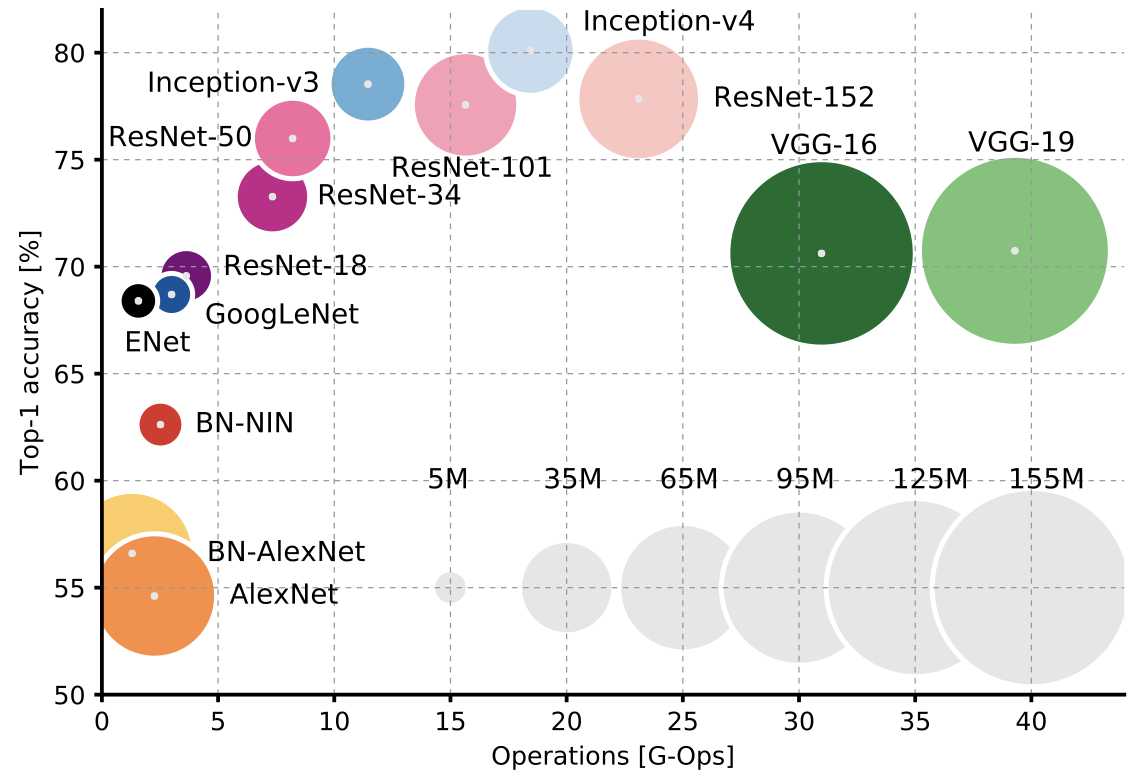

## Dataset Overview

* The Pneunomia dataset contains x-rays from patients being ``normal`` or having ``pneunomia``.

## Importing Libraries

In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install grad-cam

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.8 MB 28.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for grad-cam: filename=grad_cam-1.4.6-py3-none-any.whl size=38261 sha256=7ce4edf04148c5d53b6cb264488938b8c7f3c03402f2a2e4f6d2175a0283237c
  Stored in directory: /root/.cache/pip/wheels/53/02/43/1f75726b5c28459596067ad91e36951463c01273eef661f09f
Successfully built grad-cam


In [ ]:
!pip install pandas
!pip install seaborn
!pip install torchsummary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import time
import os
import copy

import numpy as np
import PIL as PIL
import pandas as pd
import seaborn as sns
import scikitplot as skplt

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.utils import class_weight
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt

from pytorch_grad_cam import GradCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM
from pytorch_grad_cam.utils.image import show_cam_on_image


## Global Settings

In [ ]:
data_dir = 'chest_xray_db'
categories = ['train','val','test']
batch_size = 16
num_workers = 8

# Hyperparameters
learning_rate = 0.001
num_epochs = 10

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## Dataset

### Obtaining  Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!unzip -q /content/drive/MyDrive/chest_xray_db.zip

In [ ]:
!ls chest_xray_db

test  train  val


In [ ]:

plt.ion()
use_gpu = torch.cuda.is_available()
device = torch.device('cuda' if use_gpu else 'cpu')
if use_gpu:
    print("Using CUDA")
else:
    print("Using CPU")

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Using CUDA


In [ ]:
# shows the number of batch size images and corresponding labels for each image.
# takes images and names of the images as parameters
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


### Preparing  Dataset

In [ ]:
# You should create a composite of transformations that are going to be applied on the training/test images.
# As the
# resolution of the images varies, all images have to be resized to 224x224 pixels. Next,
# you should normalise the image pixels to the [0,1] and, afterwards, normalise the data to
# zero-mean and standard-deviation using the pre-defined values given by (mean_values, std_values).
# Hint: Have a look at transforms.Compose(), transforms.ToTensor() and related functions.

mean_values = [0.485, 0.456, 0.406]
std_values = [0.229, 0.224, 0.225]

# data augmentation
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)), # resize to 224x224
        transforms.CenterCrop(224),
        transforms.RandomRotation(20), #Rotate the image by angle.
        transforms.RandomHorizontalFlip(), #Horizontally flip the given image randomly with a given probability.
        transforms.ToTensor(), # normalize pixel to 0,1
        transforms.Normalize(mean_values, std_values) # normalize
    ]),
    'val': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.CenterCrop(224), #Crops the given image at the center.
        transforms.ToTensor(),
        transforms.Normalize(mean_values, std_values)
    ]),
    'test': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.CenterCrop(224), #Crops the given image at the center.
        transforms.ToTensor(),
        transforms.Normalize(mean_values, std_values)
    ]),
}

In [ ]:
# loads the images from test and train folders who are in dataset folder
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in categories}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=num_workers) for x in categories}
dataset_sizes = {x: len(image_datasets[x]) for x in categories}
class_names = image_datasets['train'].classes
num_classes = len(class_names)

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
image_datasets['val'].classes

['healthy', 'pneunomia']

In [ ]:
image_datasets['test'].classes

['healthy', 'pneunomia']

In [ ]:
class_names

['healthy', 'pneunomia']

In [ ]:
for cate in categories:
  print('Dataset split \'{}\' number of images: {}'.format(cate, dataset_sizes[cate]))

Dataset split 'train' number of images: 2624
Dataset split 'val' number of images: 226
Dataset split 'test' number of images: 228


In [ ]:
# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

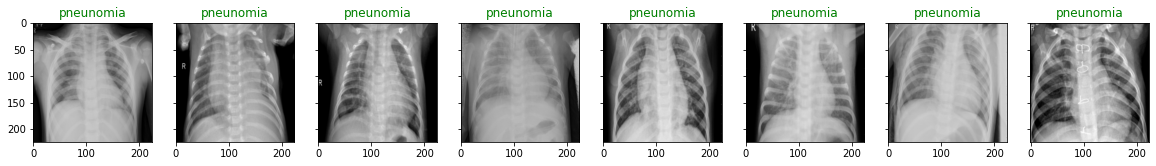

In [ ]:
# Visualize some training images
n_images = 8

fig, axes = plt.subplots(nrows=1, ncols=n_images, sharex=True, sharey=True, figsize=(20, 2.5))
orig_images = inputs[:n_images]

for ii in range(n_images):
    curr_img = orig_images[ii].detach().to(device)
    curr_img = curr_img.permute((1, 2, 0)).cpu().numpy()

    mean = np.array(mean_values)
    std = np.array(std_values)
    curr_img = std * curr_img + mean
    curr_img = np.clip(curr_img, 0, 1)

    axes[ii].imshow(curr_img)
    axes[ii].set_title('{}'.format(class_names[classes[ii]]), color='green')


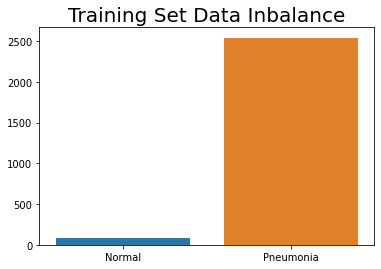

In [ ]:
train_samplesize = pd.DataFrame.from_dict(
    {'Normal': [len([os.path.join(data_dir+'/train/healthy', filename)
                     for filename in os.listdir(data_dir+'/train/healthy')])],
     'Pneumonia': [len([os.path.join(data_dir+'/train/pneunomia', filename)
                        for filename in os.listdir(data_dir+'/train/pneunomia')])]})


sns.barplot(data=train_samplesize).set_title('Training Set Data Inbalance', fontsize=20)
plt.show()

## Deep Learning Pipeline

### Model Definition

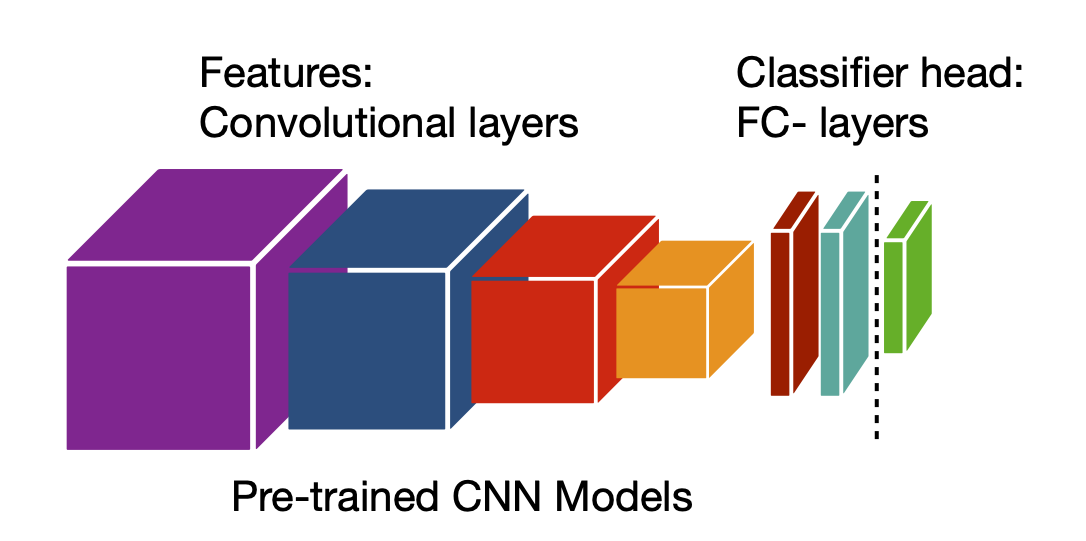

In [ ]:
class COVID_CNN(torch.nn.Module):
  def __init__(self, num_classes=num_classes):
      super(COVID_CNN, self).__init__()
      self.model = torchvision.models.resnet152(weights='DEFAULT')
      self.freeze()
      self.classifier = nn.Sequential(
            nn.Linear(self.model.fc.in_features, num_classes),
      )
      self.model.fc = self.classifier

  def freeze(self):
      for param in self.model.parameters():
          param.requires_grad = False

  def forward(self, x):
      logits = self.model(x) # copied
      probas = torch.softmax(logits, dim=1) #copied
      return logits, probas

In [ ]:
# initialise model
model = COVID_CNN(num_classes=num_classes)
print(model)

COVID_CNN(
  (model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          

In [ ]:
from torchsummary import summary

if torch.cuda.is_available():
    model.cuda()
    
summary(model.model, input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

### Loss function
Pytorch provides the 
[torch.nn.CrossEntropyLoss()](https://pytorch.org/docs/stable/nn.html#torch.nn.CrossEntropyLoss)
loss function that computes the softmax followed by the cross entropy.

Consider a 3-class problem. Let us take
an input, of true class y=1, being assigned the scores
$\hat{z} = [-100, 10, 8]$, i.e. the assigned probabilities being
$\hat{y} = [\frac{\exp(-100)}{\sum_i \exp(y_i)}, \frac{\exp(10)}{\sum_i \exp(y_i)}, \frac{\exp(8)}{\sum_i \exp(y_i)}] = [0.0000, 0.8808, 0.1192]$
the cross entropy loss is given by $-\sum_{i=0}^{3} \log(\hat{y}_y) = -\log(0.8808) \approx 0.1269$
and is computed in Pytorch as :

``` {.sourceCode .python}
f_loss = torch.nn.CrossEntropyLoss()
f_loss(torch.Tensor([[-100, 10, 8]]), torch.LongTensor([1]))
# This prints :   torch.Tensor(0.1269)
```

For now, back to our experiment, we just need to instantiate the loss :

``` {.sourceCode .python}
f_loss = torch.nn.CrossEntropyLoss()
```

In [ ]:
#class_weights = class_weight.compute_class_weight('balanced', np.unique(y), y.numpy())
class_weights = torch.tensor([10.0, 1.0],dtype=torch.float)


In [ ]:
f_loss = torch.nn.CrossEntropyLoss(weight=class_weights)

### Optimizer
In order to update the model parameters using the computed gradients (`backward()`), we need  to define an optimizer which as its names says, it optimizes the parameters of a neural network is
performed by some kind of gradient descent. In PyTorch there are different optimizers
provided in the [torch.optim
package](https://pytorch.org/docs/stable/optim.html). We will focus on the
[Adam
optimizer](https://pytorch.org/docs/stable/optim.html#torch.optim.Adam), which is one of the most common and stable optimizers. To know more about optimizers, there is a [compendium of optimizers
provided by Sebastian
Ruder](http://ruder.io/optimizing-gradient-descent/index.html). 

Note that the optimizer needs a reference to the parameters that it needs
to modify.

```
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
```

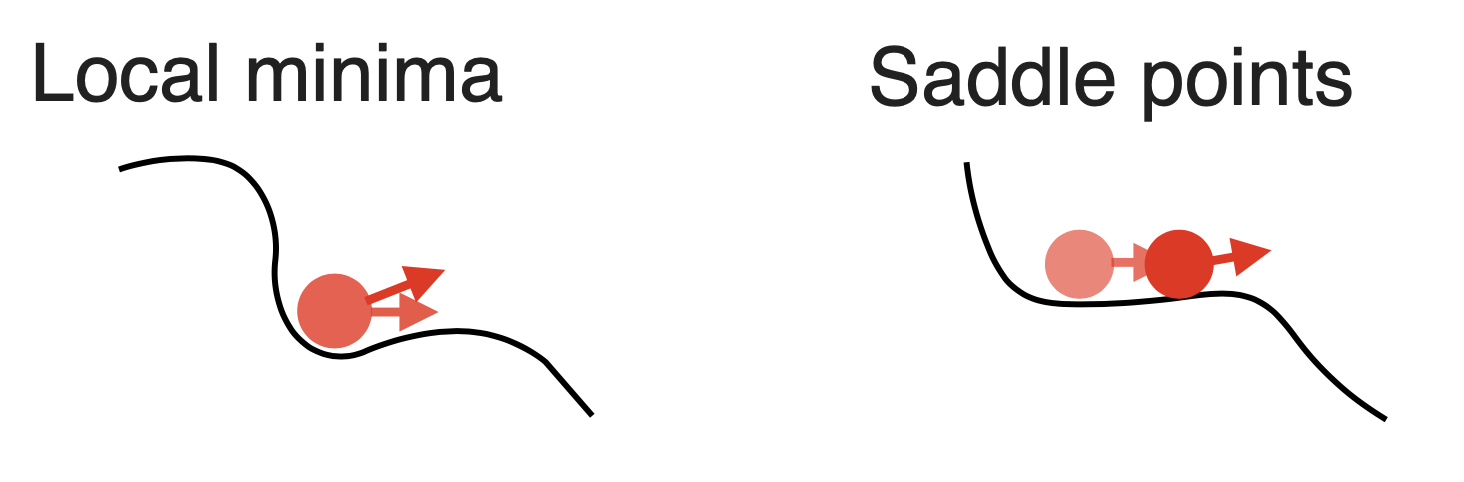

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

### Scheduler
Use a StepLR scheduler to train your model (StepLR)

In [ ]:
from torch.optim.lr_scheduler import StepLR

scheduler = StepLR(optimizer, step_size=30, gamma=0.1)

### Model Training
Training a neural network involves iterating over the mini-batches of the training set and, for each mini-batch, computing the forward- and backward- propagations to provide the optimizer the gradient from which it can update the model parameters.


- Learning Process:
    1. Put inputs/labels into GPU device.
    2. Do forward propagation => Predictions
    3. Compute Loss function
    4. Do backward propagation => Gradients w.r.t. parameters
    5. Update parameters using gradients
        - `parameters = parameters - learning_rate * parameters_gradients`
    6. REPEAT learning process

In [ ]:
def compute_accuracy_and_loss(model, data_loader, device):
    
    correct_pred, num_examples = 0, 0
    
    cross_entropy = 0.

    predictions_arr = []
    targets_arr  = []

    for ii, (features, targets) in enumerate(data_loader):
            
        features = features.to(device) # x to device
        targets = targets.to(device) # y to device

        logits, probas = model(features) # forward propagation z=logits, a=f(z)
        cross_entropy += F.cross_entropy(logits, targets).item()
        #cross_entropy += F.nll_loss(torch.log(probas), targets)

        _, predicted_labels = torch.max(probas, 1) # y_hat=predicted_labels
        num_examples += targets.size(0)

        correct_pred += (predicted_labels == targets).sum()
        targets_arr.append(targets)
        predictions_arr.append(predicted_labels)

    return correct_pred.float()/num_examples * 100, cross_entropy/num_examples, targets_arr, predictions_arr

In [ ]:
def train(model, num_epochs, train_loader, valid_loader):
  
  minibatch_cost = []
  train_acc_lst, valid_acc_lst = [], []
  train_loss_lst, valid_loss_lst = [], []

  best_acc = 0
  best_loss = np.inf

  start_time = time.time()
  for epoch in range(num_epochs):

      model.train()

      for batch_idx, (features, targets) in enumerate(train_loader):
          
          features = features.to(device) 
          targets = targets.to(device)
              
          # forward-propagation
          logits, probas = model.forward(features)

          # compute cost function
          cost = F.cross_entropy(logits, targets)

          # clean gradients
          optimizer.zero_grad()
          
          # compute derivatives
          cost.backward()

          # append minibatch cost
          minibatch_cost.append(cost.item())
          
          # update model parameters
          optimizer.step() # w = w - learning_rate * partial_deriv_error
          
          # logging results
          if not batch_idx % 50:
              print ('Epoch: %05d/%05d | Batch %05d/%05d | Cost: %.4f' 
                    %(epoch+1, num_epochs, batch_idx, 
                      len(train_loader), cost))
      scheduler.step()
              
      with torch.set_grad_enabled(False):
          train_acc, train_loss, train_targets, train_preds = compute_accuracy_and_loss(model, train_loader, device=device) # compute accuracy and loss on train dataset
          valid_acc, valid_loss, valid_targets, valid_preds = compute_accuracy_and_loss(model, valid_loader, device=device) # compute accuracy and loss on validation dataset

          print('Epoch: %05d/%05d | Train cost: %.4f | Valid cost: %.4f | Train acc.: %.4f%% | Val.acc.: %.4f%%' % (
                epoch+1, num_epochs, 
                train_loss,
                valid_loss,
                train_acc,
                valid_acc))
          
          train_acc_lst.append(train_acc)
          valid_acc_lst.append(valid_acc)
          train_loss_lst.append(train_loss)
          valid_loss_lst.append(valid_loss)

          
      print('Time elapsed: %.2f min' % ((time.time() - start_time)/60))
      
  print('Total Training Time: %.2f min' % ((time.time() - start_time)/60))

  return minibatch_cost, train_loss_lst, valid_loss_lst, train_acc_lst, valid_acc_lst

In [ ]:
minibatch_cost, train_loss_lst, valid_loss_lst, train_acc_lst, valid_acc_lst = train(model, num_epochs, dataloaders['train'], dataloaders['val']) # do training

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch: 00001/00010 | Batch 00000/00164 | Cost: 0.7747
Epoch: 00001/00010 | Batch 00050/00164 | Cost: 0.0174
Epoch: 00001/00010 | Batch 00100/00164 | Cost: 0.1406
Epoch: 00001/00010 | Batch 00150/00164 | Cost: 0.0419
Epoch: 00001/00010 | Train cost: 0.0035 | Valid cost: 0.0079 | Train acc.: 98.2851% | Val.acc.: 95.1327%
Time elapsed: 1.36 min
Epoch: 00002/00010 | Batch 00000/00164 | Cost: 0.0809
Epoch: 00002/00010 | Batch 00050/00164 | Cost: 0.2113
Epoch: 00002/00010 | Batch 00100/00164 | Cost: 0.0627
Epoch: 00002/00010 | Batch 00150/00164 | Cost: 0.0180
Epoch: 00002/00010 | Train cost: 0.0023 | Valid cost: 0.0165 | Train acc.: 99.1235% | Val.acc.: 94.6903%
Time elapsed: 2.69 min
Epoch: 00003/00010 | Batch 00000/00164 | Cost: 0.0248
Epoch: 00003/00010 | Batch 00050/00164 | Cost: 0.0064
Epoch: 00003/00010 | Batch 00100/00164 | Cost: 0.0185
Epoch: 00003/00010 | Batch 00150/00164 | Cost: 0.0251
Epoch: 00003/00010 | Train cost: 0.0016 | Valid cost: 0.0085 | Train acc.: 99.3902% | Val.acc.: 

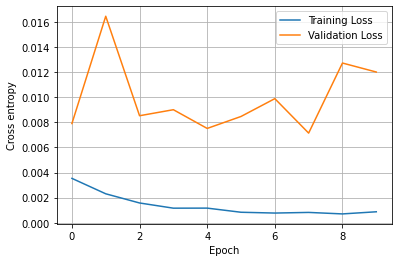

In [90]:
plt.plot(range(len(train_loss_lst)), (train_loss_lst), label='Training Loss')
plt.plot(range(len(valid_loss_lst)), (valid_loss_lst), label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross entropy')
plt.xlabel('Epoch')
plt.grid()
plt.show()

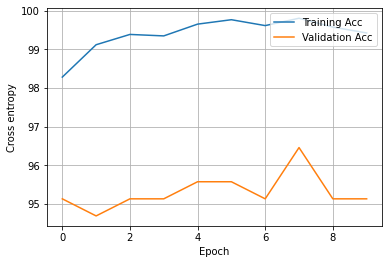

In [99]:
new_train_acc_lst = [ x.cpu() for x in train_acc_lst ]
new_valid_acc_lst = [ x.cpu() for x in valid_acc_lst ]

plt.plot(range(len(new_train_acc_lst)), new_train_acc_lst, label='Training Acc')
plt.plot(range(len(new_valid_acc_lst)), new_valid_acc_lst, label='Validation Acc')
plt.legend(loc='upper right')
plt.ylabel('Cross entropy')
plt.xlabel('Epoch')
plt.grid()
plt.show()

### Model Evaluation
Once you've trained your model, you're asked to 

In [91]:
test_acc, test_loss, test_targets, test_preds = compute_accuracy_and_loss(model, dataloaders['test'], device=device) # compute accuracy on test dataset
print('Test accuracy: %.2f%%' % (test_acc))

Test accuracy: 77.19%


In [ ]:
test_targets = torch.hstack(test_targets).cpu().detach().numpy()
test_preds = torch.hstack(test_preds).cpu().detach().numpy()

In [ ]:
print(test_targets.shape)
print(test_preds.shape)

(228,)
(228,)


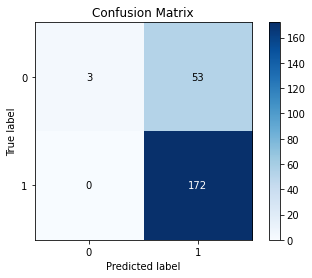

In [ ]:
skplt.metrics.plot_confusion_matrix(test_targets,test_preds, normalize=False)

In [ ]:
for ii in range(len(class_names)):
    correct = ((test_targets == ii)*1) * ((np.array(test_preds) == test_targets)*1)
    print('{}, {}: '.rjust(10).format(ii, class_names[ii]) + '{:.2f}%'.
          format(100*correct.sum()/test_targets[test_targets == ii].shape[0]))

  0, healthy: 5.36%
  1, pneunomia: 100.00%


In [119]:
# obtain one batch of test images
data_iter = iter(dataloaders['test'])

images, targets = next(data_iter)
# images, targets = data_iter.next()

In [ ]:
# get sample outputs
logits, probas = model(images.to(device))

# convert output probabilities to predicted class
_, preds = torch.max(probas, 1)

In [ ]:
# Visualise some predicted images
fig = plt.figure(figsize=(25, 15))
for idx in np.arange(len(images)):
    ax = fig.add_subplot(5, 50/5, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx].numpy(), (1, 2, 0)))
    ax.set_title("{} ({})".format(class_names[preds[idx]], class_names[targets[idx]]),
                 color=("green" if preds[idx]==targets[idx].item() else "red"))

## Interpretability
Interpreting how the CNN model obtained its predictions helps to gain trust on the applicability of AI for specific tasks. To do so, investigate: ($i$) how the trained filters look like (visualise the learned weights),  ($ii$) use class activation maps (CAM or more recent techniques) to visualise which parts of the image were actived more for solving our image classification task?



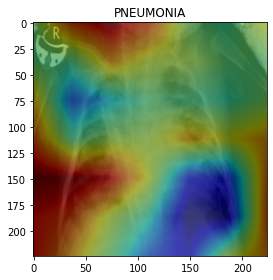

## 2) Using another model
We are now using the inception-v3 model instead and compare our results.

In [130]:
class COVID_CNN_Alternative(torch.nn.Module):
  def __init__(self, num_classes=num_classes):
      super(COVID_CNN_Alternative, self).__init__()
      self.model = torchvision.models.resnet50(weights='DEFAULT')
      self.freeze()
      self.classifier = nn.Sequential(
            nn.Linear(self.model.fc.in_features, num_classes),
      )
      self.model.fc = self.classifier

  def freeze(self):
      for param in self.model.parameters():
          param.requires_grad = False

  def forward(self, x):
      logits = self.model(x) # copied
      probas = torch.softmax(logits, dim=1) #copied
      return logits, probas


In [ ]:
# initialise model
model = COVID_CNN_Alternative(num_classes=num_classes)
print(model)

In [132]:
if torch.cuda.is_available():
    model.cuda()

In [133]:
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [134]:
scheduler = StepLR(optimizer, step_size=30, gamma=0.1)

In [135]:
num_epochs = 5

minibatch_cost, train_loss_lst, valid_loss_lst, train_acc_lst, valid_acc_lst = train(model, num_epochs, dataloaders['train'], dataloaders['val']) # do training

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch: 00001/00005 | Batch 00000/00164 | Cost: 0.7648
Epoch: 00001/00005 | Batch 00050/00164 | Cost: 0.0323
Epoch: 00001/00005 | Batch 00100/00164 | Cost: 0.0284
Epoch: 00001/00005 | Batch 00150/00164 | Cost: 0.0314
Epoch: 00001/00005 | Train cost: 0.0048 | Valid cost: 0.0115 | Train acc.: 97.4466% | Val.acc.: 95.1327%
Time elapsed: 1.21 min
Epoch: 00002/00005 | Batch 00000/00164 | Cost: 0.0361
Epoch: 00002/00005 | Batch 00050/00164 | Cost: 0.0236
Epoch: 00002/00005 | Batch 00100/00164 | Cost: 0.0302
Epoch: 00002/00005 | Batch 00150/00164 | Cost: 0.0363
Epoch: 00002/00005 | Train cost: 0.0027 | Valid cost: 0.0097 | Train acc.: 98.1326% | Val.acc.: 95.1327%
Time elapsed: 2.36 min
Epoch: 00003/00005 | Batch 00000/00164 | Cost: 0.0326
Epoch: 00003/00005 | Batch 00050/00164 | Cost: 0.0267
Epoch: 00003/00005 | Batch 00100/00164 | Cost: 0.0237
Epoch: 00003/00005 | Batch 00150/00164 | Cost: 0.0672
Epoch: 00003/00005 | Train cost: 0.0018 | Valid cost: 0.0080 | Train acc.: 99.3140% | Val.acc.: 

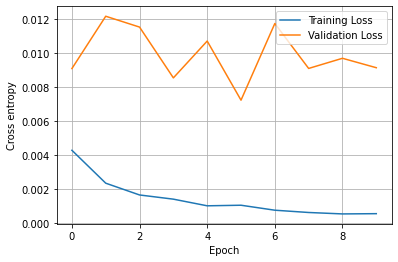

In [120]:
plt.plot(range(len(train_loss_lst)), (train_loss_lst), label='Training Loss')
plt.plot(range(len(valid_loss_lst)), (valid_loss_lst), label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross entropy')
plt.xlabel('Epoch')
plt.grid()
plt.show()

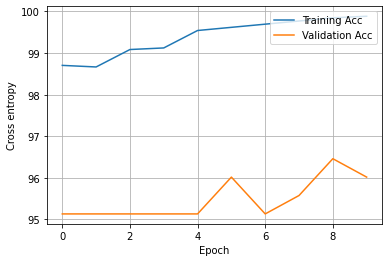

In [121]:
new_train_acc_lst = [ x.cpu() for x in train_acc_lst ]
new_valid_acc_lst = [ x.cpu() for x in valid_acc_lst ]

plt.plot(range(len(new_train_acc_lst)), new_train_acc_lst, label='Training Acc')
plt.plot(range(len(new_valid_acc_lst)), new_valid_acc_lst, label='Validation Acc')
plt.legend(loc='upper right')
plt.ylabel('Cross entropy')
plt.xlabel('Epoch')
plt.grid()
plt.show()

In [122]:
test_acc, test_loss, test_targets, test_preds = compute_accuracy_and_loss(model, dataloaders['test'], device=device) # compute accuracy on test dataset
print('Test accuracy: %.2f%%' % (test_acc))

Test accuracy: 78.51%


In [123]:
test_targets = torch.hstack(test_targets).cpu().detach().numpy()
test_preds = torch.hstack(test_preds).cpu().detach().numpy()

In [124]:
print(test_targets.shape)
print(test_preds.shape)

(228,)
(228,)


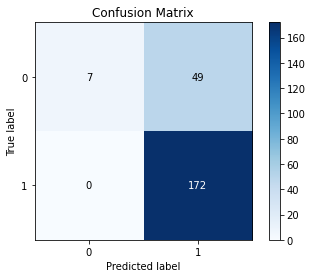

In [125]:
skplt.metrics.plot_confusion_matrix(test_targets,test_preds, normalize=False)

In [126]:
for ii in range(len(class_names)):
    correct = ((test_targets == ii)*1) * ((np.array(test_preds) == test_targets)*1)
    print('{}, {}: '.rjust(10).format(ii, class_names[ii]) + '{:.2f}%'.
          format(100*correct.sum()/test_targets[test_targets == ii].shape[0]))

  0, healthy: 12.50%
  1, pneunomia: 100.00%


In [127]:
# obtain one batch of test images
data_iter = iter(dataloaders['test'])

images, targets = next(data_iter)
# images, targets = data_iter.next()

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [128]:
# get sample outputs
logits, probas = model(images.to(device))

# convert output probabilities to predicted class
_, preds = torch.max(probas, 1)

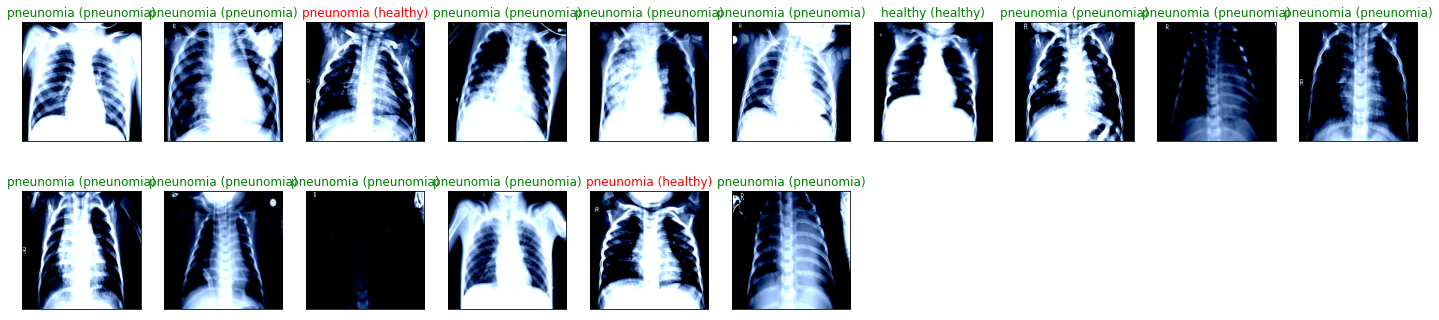

In [129]:
# Visualise some predicted images
fig = plt.figure(figsize=(25, 15))
for idx in np.arange(len(images)):
    ax = fig.add_subplot(5, 50/5, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx].numpy(), (1, 2, 0)))
    ax.set_title("{} ({})".format(class_names[preds[idx]], class_names[targets[idx]]),
                 color=("green" if preds[idx]==targets[idx].item() else "red"))

## 6) Machine Learning Pipeline [BONUS]
Instead of fine-tune your CNN model, extract a Feature Vector and use  ML classifiers (e.g. Random Forest, XGBoost ) to classify the images based on the extracted features. Compare their results and also against the statistics extracted from the transfer-learning approach. 
A Figure explaining the ML Pipeline is given below. 
Hint: use the sklearn library to train your different classifiers, e.g. [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), [XGBoost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html). For hyperparameter tuning, use sklearn [grid-search](https://scikit-learn.org/stable/modules/grid_search.html). In this approach, you feed the batches onto your pre-trained CNN models (feed-forward propagation). You can collect these vectors and use them as training inputs for your ML models.

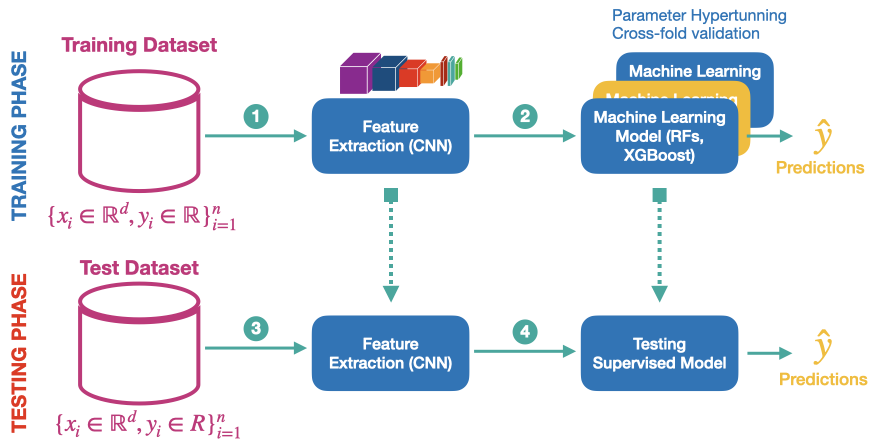